In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('salinityTempC.csv')
df = df[np.isfinite(df['Salinity'])]
df = df[np.isfinite(df['TempC'])]
# df = df[:10]
df.shape

(814247, 3)

In [3]:
df.head()

,Unnamed: 0,Salinity,TempC
0,0,33.440,10.50
1,1,33.440,10.46
2,2,33.437,10.46
3,3,33.420,10.45
4,4,33.421,10.45


In [4]:
x_train, x_test, y_train, y_test = train_test_split(df[['Salinity']],df.TempC,train_size=0.95)
len(x_train)

773534

In [5]:
len(x_test)

40713

In [6]:
#convert to numpy array
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

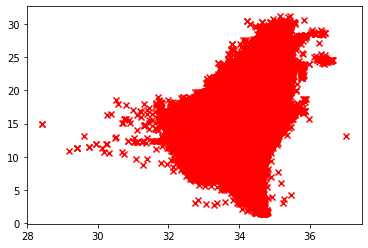

In [7]:
plt.scatter(df['Salinity'], df['TempC'],marker='x',color='red')
plt.xlabel('Salinity')
plt.ylabel('Temp (C)')

In [8]:
def error(x, y, theta):
    sum = 0
    trainLen = len(x)
    for i in range(0,trainLen):
        sum = sum + (( theta[0] + theta[1]*x[i][0]) - y[i])**2
    return sum/(2*trainLen)

In [9]:
error(x_train,y_train,[0,0])

67.90032610482059

In [10]:
def gd(x,y,theta,alpha,iter):
    trainLen = len(x)
    for i in range(0,iter):
        sumTheta0 = 0
        sumTheta1 = 0
        for j in range(0,trainLen):
            sumTheta0 = sumTheta0 + ((theta[0] + theta[1]*x[j][0]) - y[j])
            sumTheta1 = sumTheta1 + ((theta[0] + theta[1]*x[j][0]) - y[j])*x[j][0]
#             print('x: {}, y: {}'.format(x[j][0], y[j]))
#             print('sumthing theta0: {}, sumthing theta1: {}'.format(((theta[0] + theta[1]*x[j][0]) - y[j]), ((theta[0] + theta[1]*x[j][0]) - y[j])*x[j][0]))
#             print('sumTheta0: {}, sumTheta1: {}\n'.format(sumTheta0, sumTheta1))
        theta[0] = theta[0] - (alpha/trainLen * sumTheta0)
        theta[1] = theta[1] - (alpha/trainLen * sumTheta1)
        print(error(x,y,theta))
        
    return [theta[0], theta[1]]

In [11]:
theta = [0,0]
alpha = 0.001
theta = gd(x_train,y_train, theta, alpha, 5)

10.506662639314692
9.275844701086443
9.249448649977575
9.248881633501044
9.24886852511747


In [12]:
theta

[0.009602552145087847, 0.31975102434270575]

In [13]:
def prediction(x, theta):
    pred = []
    testLen = len(x)
    for i in range(0,testLen):
        pred.append(theta[0] + theta[1]*x[i][0])
    return pred

In [14]:
pred = prediction(x_test, theta)
len(pred)

40713

In [15]:
pred[0]


10.868347338823375

In [16]:
y_test[0]

16.08

In [17]:
rmes_error = mean_squared_error(y_test,pred)
rmes_error

18.600911832906604

In [18]:
error(x_test,y_test,theta)

9.30045591645331